In [2]:
import glob
import sys
import os
import numpy as np
import tqdm
from sklearn.model_selection import train_test_split
from tensorflow import keras
from functools import partial
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

def data_load():
    files = glob.glob('../data/*')
    if not files:
        print("Chck Phath")
        sys.exit()
    else:
        files.remove(r'../data\raw_data')
        files.remove(r'../data\raw_data_')

    _feature=[]
    label=[]
    for address in files:
        label_ = os.path.basename(address)
        for num in glob.glob(address+'/*'):
            _feature.append(np.load(num))
            label.append([label_])
        print(label_)
    target = np.array(label).flatten()
    return _feature, target.reshape((-1,))

features, label = data_load()
encoder = LabelEncoder()
target = encoder.fit_transform(label)


X_train,  X_valid, y_train, y_valid = train_test_split(np.array(features), target, test_size=0.2, random_state=0)
X_test,  X_valid, y_test, y_valid = train_test_split(np.array(features), target, test_size=0.5, random_state=0)
X_train = X_train / 255.0
X_valid = X_valid / 255.0
X_test = X_test / 255.0

y_test_raw = y_test.copy()
y_test = to_categorical(y_test)
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)
number_of_classes = y_valid.shape[1]


around
b
fracture
ground
mechanics
science
smile
strain
stress
t


In [4]:
DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3,padding="SAME")
model = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=3, input_shape=[210, 210, 10]),
    keras.layers.Activation("relu"),

    DefaultConv2D(filters=64),
    keras.layers.Activation("relu"),

    DefaultConv2D(filters=128),
    keras.layers.Activation("relu"),
    DefaultConv2D(filters=128),
    keras.layers.Activation("relu"),

    keras.layers.MaxPooling2D(pool_size=2),

    DefaultConv2D(filters=256),
    keras.layers.Activation("relu"),

    DefaultConv2D(filters=256),
    keras.layers.Activation("relu"),

    keras.layers.MaxPooling2D(pool_size=2),

    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=number_of_classes, activation="softmax"),
])

model.compile(loss="categorical_crossentropy", optimizer='adam',
              metrics=[keras.metrics.TopKCategoricalAccuracy(k=1),
                       keras.metrics.TopKCategoricalAccuracy(k=2),
                       keras.metrics.TopKCategoricalAccuracy(k=3)])
history = model.fit(X_train, y_train, epochs=300, validation_data=(X_valid, y_valid))
score=model.evaluate(X_test,y_test)

Train on 514 samples, validate on 322 samples
Epoch 1/300
514/514 [==============================] - 12s 24ms/sample - loss: 2.3207 - accuracy: 0.1342 - top_k_categorical_accuracy: 0.5506 - val_loss: 2.0639 - val_accuracy: 0.3168 - val_top_k_categorical_accuracy: 0.6894

In [ ]:
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]
epoch_count = range(1, len(training_loss)+1)

training_acc = history.history["accuracy"]
test_acc = history.history["val_accuracy"]

plt.plot(epoch_count, training_loss, "r-")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["training_loss", "test_loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.savefig('./figure/loss.png',dpi=300,bbox_inches='tight')

In [ ]:
plt.plot(epoch_count, training_acc, "r-")
plt.plot(epoch_count, test_acc, "b-")
plt.legend(["training_acc", "test_acc"])
plt.xlabel("Epoch")
plt.ylabel("accuracy")
plt.savefig('./figure/acc.png',dpi=300,bbox_inches='tight')

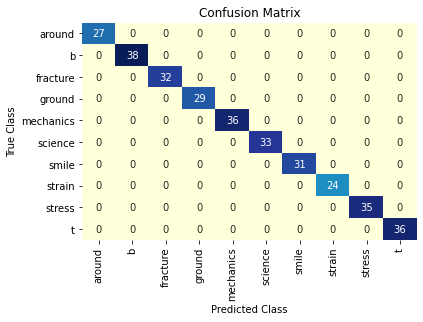

In [5]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

y_prediction = model.predict(X_test)

matrix = confusion_matrix(encoder.inverse_transform(y_test_raw), encoder.inverse_transform(np.argmax(y_prediction, axis=1)))


dataframe = pd.DataFrame(matrix, index = np.unique(label), columns=np.unique(label))
sns.heatmap(dataframe, annot=True, cbar=None, cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.savefig('./figure/heaat.png',dpi=300,bbox_inches='tight')
plt.show()

In [3]:
print(score)

[2.296611960431868, 0.10280374, 0.55451715]


In [7]:
model.save("VGG.h5")

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 210, 210, 64)      5824      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 210, 210, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 105, 105, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 105, 105, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 105, 105, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 52, 52, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 52, 52, 256)       2